In [1]:
import uxyeye
import deepSI
from matplotlib import pyplot as plt

In [2]:
# sys_data_deepSI = 
sys_data_deepSI = deepSI.datasets.WienerHammerBenchMark(split_data=False)#sys_data_deepSI[:134020], sys_data_deepSI[134020:]
sys_data_uxyeye = uxyeye.data_sets.WienerHammerBenchMark(split_data=False)

In [3]:
sys_train_deepSI,sys_test_deepSI = sys_data_deepSI[:134020], sys_data_deepSI[134020:]
sys_train_uxyeye,sys_test_uxyeye = sys_data_uxyeye[:134020], sys_data_uxyeye[134020:]

In [4]:
sys_uxyeye = uxyeye.fit_systems.statespace_encoder_system_base(na=50,nb=50,nx=8,n_nodes_per_layer=60,n_hidden_layers=2,net_base=uxyeye.utils.torch_nets.modified_Lin_network)

In [5]:
sys_deepSI = deepSI.fit_systems.Fit_system.System_encoder(nx=8,na=50,nb=50)

In [12]:
sys_uxyeye.fit(sys_train_uxyeye,verbose=2,epochs=100,nf=30,sim_val=sys_test_uxyeye[:5000],batch_size=1024)

N_train_samples=134020 batch_size=1024 N_batch_updates_per_epoch=130
init ##################### New Lowest Validation loss: 1.070347064289305 #############################


Epoch:    1 Training loss:  0.3255 Validation loss = 0.2614, time Loss: 26.5%, back: 44.6%, val: 13.9%
##################### New Lowest Validation loss: 0.2614100753607664 #############################
Epoch:    2 Training loss: 0.02546 Validation loss = 0.1497, time Loss: 27.9%, back: 48.3%, val: 15.3%
##################### New Lowest Validation loss: 0.14972262010082654 #############################
Epoch:    3 Training loss: 0.01368 Validation loss = 0.1402, time Loss: 28.3%, back: 49.7%, val: 15.8%
##################### New Lowest Validation loss: 0.14022996122869022 #############################
Epoch:    4 Training loss:  0.0103 Validation loss = 0.1188, time Loss: 28.7%, back: 50.2%, val: 16.1%
##################### New Lowest Validation loss: 0.11876787292705374 #############################
Epoch:    5 Training loss: 0.00943 Validation loss = 0.1174, time Loss: 28.9%, back: 50.7%, val: 16.3%
##################### New Lowest Validation loss: 0.11743679667346792 ################

Epoch:   53 Training loss: 0.001136 Validation loss = 0.05089, time Loss: 30.2%, back: 52.6%, val: 16.2%
Epoch:   54 Training loss: 0.001002 Validation loss = 0.03891, time Loss: 30.2%, back: 52.6%, val: 16.2%
Epoch:   55 Training loss: 0.001068 Validation loss = 0.06699, time Loss: 30.2%, back: 52.6%, val: 16.2%
Epoch:   56 Training loss: 0.001011 Validation loss = 0.03337, time Loss: 30.1%, back: 52.6%, val: 16.2%
##################### New Lowest Validation loss: 0.03337206926992768 #############################
Epoch:   57 Training loss: 0.0009184 Validation loss = 0.0344, time Loss: 30.2%, back: 52.7%, val: 16.1%
Epoch:   58 Training loss: 0.000843 Validation loss = 0.03227, time Loss: 30.2%, back: 52.6%, val: 16.1%
##################### New Lowest Validation loss: 0.032269463489664994 #############################
Epoch:   59 Training loss: 0.0009865 Validation loss = 0.04335, time Loss: 30.2%, back: 52.6%, val: 16.1%
Epoch:   60 Training loss: 0.0008115 Validation loss = 0.04267,

In [6]:
# sys_uxyeye.save_system(dir_placement='./',name='encoder_uxyeye_best')
# sys_uxyeye.load_system(dir_placement=sys_uxyeye.checkpoint_dir,name='_last')
# sys_uxyeye.save_system(dir_placement='./',name='encoder_uxyeye_last')
sys_uxyeye.load_system(dir_placement='./',name='encoder_uxyeye_best')

In [7]:
#SAVE!
#OPTIMIZER

In [8]:
sys_deepSI.fit(sys_train_deepSI, epochs=0, verbose=1, batch_size=1024, Loss_kwargs=dict(nf=30), sim_val=sys_test_deepSI[:5000])

########## new best ###########
N_training_samples=133941, batch_size=1024, N_batch_updates_per_epoch=130


In [9]:
from torch import optim

sys_deepSI.optimizer = optim.Adam(sys_deepSI.paremters)

In [10]:
sys_deepSI.fit(sys_train_deepSI, epochs=100, verbose=1, batch_size=1024, Loss_kwargs=dict(nf=30), sim_val=sys_test_deepSI[:5000])

########## new best ###########
N_training_samples=133941, batch_size=1024, N_batch_updates_per_epoch=130


########## new best ###########
epoch=0 NRMS= 17.5326% Loss=0.25271
########## new best ###########
epoch=1 NRMS= 12.9002% Loss=0.01633
########## new best ###########
epoch=2 NRMS= 11.0207% Loss=0.01031
########## new best ###########
epoch=3 NRMS=  9.8582% Loss=0.00806
########## new best ###########
epoch=4 NRMS=  9.1188% Loss=0.00647
epoch=5 NRMS=  9.3742% Loss=0.00532
########## new best ###########
epoch=6 NRMS=  8.9842% Loss=0.00502
########## new best ###########
epoch=7 NRMS=  8.1984% Loss=0.00451
########## new best ###########
epoch=8 NRMS=  7.8191% Loss=0.00459
########## new best ###########
epoch=9 NRMS=  7.3033% Loss=0.00387
epoch=10 NRMS=  8.4668% Loss=0.00381
########## new best ###########
epoch=11 NRMS=  6.9228% Loss=0.00384
epoch=12 NRMS=  9.4390% Loss=0.00363
########## new best ###########
epoch=13 NRMS=  6.8343% Loss=0.00326
########## new best ###########
epoch=14 NRMS=  6.6410% Loss=0.00335
epoch=15 NRMS=  7.6493% Loss=0.00307
epoch=16 NRMS=  7.8730% Loss=0.003

In [11]:
sys_deepSI.checkpoint_load_system()

Text(0, 0.5, 'Simulation loss test')

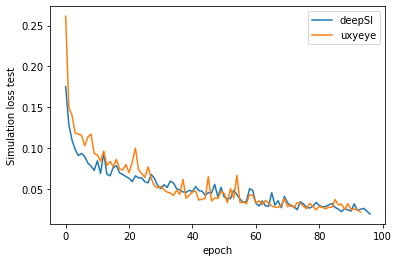

In [19]:
plt.plot(sys_deepSI.Loss_val[2:])
plt.plot(sys_uxyeye.Loss_val)
plt.legend(['deepSI','uxyeye'])
plt.xlabel('epoch')
plt.ylabel('Simulation loss test')

[0.2614100753607664,
 0.14972262010082654,
 0.14022996122869022,
 0.11876787292705374,
 0.11743679667346792,
 0.11599391276962195,
 0.10306067907180431,
 0.11385795121986861,
 0.11722454370078675,
 0.09367843662980786,
 0.09202808656136754,
 0.08421189518378853,
 0.09668203772151276,
 0.07895379593292194,
 0.08407772408632835,
 0.07762667744305596,
 0.08646100848958953,
 0.07470403092204693,
 0.07360928727497267,
 0.08011523095140774,
 0.07022382319822389,
 0.0832864051838072,
 0.10023666887336147,
 0.07371470708369991,
 0.06889490372104504,
 0.06444804376374123,
 0.07736356103618432,
 0.06283382446323285,
 0.054196658887933055,
 0.0515168899355979,
 0.05344317608625236,
 0.04938590909919933,
 0.046510813912477,
 0.045349986740398134,
 0.04242313913372983,
 0.04877706257970201,
 0.04378279044106805,
 0.06196377765431688,
 0.039094451616792744,
 0.04281952857291817,
 0.046758992954455326,
 0.04771104934637607,
 0.03671109992059411,
 0.03788140682300484,
 0.03871474831207556,
 0.06542598

In [35]:
sys_data_norm = sys_deepSI.norm.transform(sys_test_deepSI)
obs, k0 = sys_deepSI.init_state_multi(sys_data_norm, nf=len(sys_data_norm)-50)
_,_,ufuture,yfuture = sys_data_norm.to_hist_future_data(na=k0,nb=k0,nf=len(sys_data_norm)-50)
predict = []
real = []
for unow,ynow in zip(np.swapaxes(ufuture,0,1),np.swapaxes(yfuture,0,1)):
    predict.append(obs)
    real.append(ynow)
#     Losses.append(np.mean((ynow-obs)**2)**0.5)
    obs = sys_deepSI.step_multi(unow)
# return np.array(Losses)
predict = np.array(predict)[:,0]
real = np.array(real)[:,0]

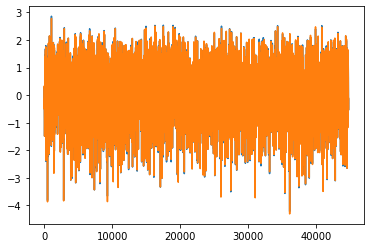

0.035994152412945624

In [42]:
plt.plot(predict)
plt.plot(real)
plt.show()

np.mean((predict-real)**2)**0.5/np.std(real)

In [52]:
Ypredict = []
Yreal = []
sys_data_norm = sys_deepSI.norm.transform(sys_test_deepSI)

U = sys_data_norm.u
obs, k0 = sys_deepSI.init_state(sys_data_norm) #is reset if init_state is not defined #normed obs
# Y.extend(sys_data_norm.y[:k0])


for action,yreal in zip(U[k0:],sys_data_norm.y[k0:]):
    Ypredict.append(obs)
    Yreal.append(yreal)
    obs = sys_deepSI.step(action)
Ypredict = np.array(Ypredict)
Yreal = np.array(Yreal)

In [53]:
U[k0:],ufuture[0],yfuture[0],Yreal #u and y are the same

(array([-0.37152118, -1.04570045, -1.27414976, ..., -1.61834671,
        -1.70414211, -1.70515744]),
 array([-0.37152118, -1.04570045, -1.27414976, ..., -1.61834671,
        -1.70414211, -1.70515744]),
 array([-0.48205534, -0.49474241, -0.49756176, ..., -0.21703657,
        -0.1606496 , -0.11835937]),
 array([-0.48205534, -0.49474241, -0.49756176, ..., -0.21703657,
        -0.1606496 , -0.11835937]))

In [54]:
Ypredict,predict #found offset present

(array([-0.46565312, -0.47853807, -0.49326128, ..., -0.24188784,
        -0.18554187, -0.1399833 ]),
 array([-0.46565312, -0.47853807, -0.49326128, ..., -0.24188784,
        -0.18554187, -0.1399833 ], dtype=float32))

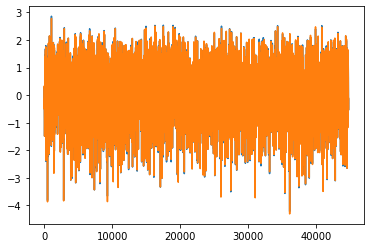

0.035994152412945624

In [55]:
plt.plot(Ypredict)
plt.plot(Yreal)
plt.show()

np.mean((Ypredict-Yreal)**2)**0.5/np.std(Yreal)

12.884041966245285

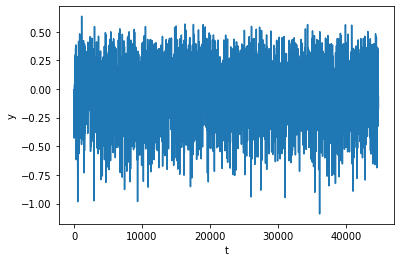

In [16]:
import numpy as np
sys_test_deepSI.plot()
np.mean((sys_test_deepSI_predict-sys_test_deepSI).y**2)**0.5/np.std(sys_test_deepSI.y)*100


In [21]:
sys_test_deepSI_predict

System_data of length: 44780 nu=None ny=None normed=False

In [20]:
sys_test_deepSI

System_data of length: 44780 nu=None ny=None normed=False

In [19]:
12.884041966245285*sys_deepSI.norm.ystd

3.1380513454031043

In [12]:
sys_test_deepSI_predict = sys_deepSI.apply_experiment(sys_test_deepSI)

In [23]:
sys_test_deepSI_predict.y

array([-0.00755352, -0.07278847, -0.13081323, ..., -0.08674812,
       -0.07565182, -0.06876222])

In [24]:
sys_test_deepSI.y

array([-0.00755352, -0.07278847, -0.13081323, ..., -0.094419  ,
       -0.08068533, -0.07038507])